<a href="https://colab.research.google.com/github/RossPereira/EmocaoClientes/blob/main/EmocaoClientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problema de negócio:**

O Departamento de relações públicas da empresa gostaria de uma maneira mais rápida e eficiênte de monitorar o tipo de sentimentos que os clientes estão tendo com relação a seus produtos, pois o processo atual de monitoramento é muito demorado, sem nenhum tipo de automação

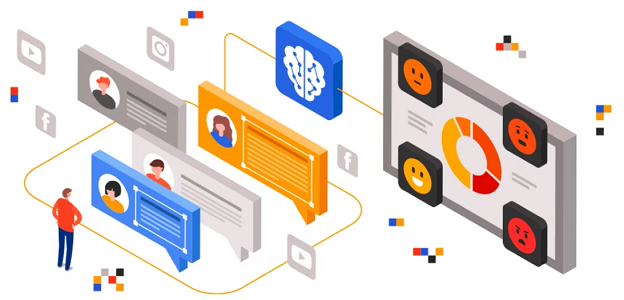

## **Importação das Bibliotecas, Base de dados e Análise Descritiva**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Importando a Base direto do Github
baseLink = "https://raw.githubusercontent.com/RossPereira/EmocaoClientes/main/Bases/Alexa.tsv"
reviews_df = pd.read_csv(baseLink, sep = '\t')
pd.set_option('display.max_columns', None)

In [4]:
# Verificando Número de Linhas e Colunas
reviews_df.shape

(3150, 5)

In [5]:
# Visualizando Registros da Base
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


**Informações sobre as Colunas**

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
# Nesse Caso as Medidas Estatisticas não se aplicam a Feedback
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


**Visualizando o Total de Feedbacks Positivos e Negativos**

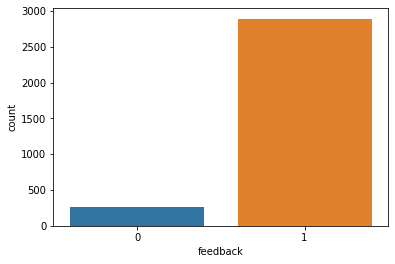

In [8]:
sns.countplot(reviews_df['feedback']);

**Visualizando o Total de Votos**

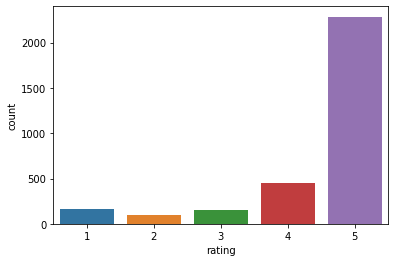

In [9]:
sns.countplot(x = 'rating', data = reviews_df);

**Visualizando uma Nuvem de Palavras com as Palavras mais Frequentes das Avaliações**

In [10]:
sentences = reviews_df['verified_reviews'].tolist()

In [11]:
sentences_as_one_string = ' '.join(sentences)

In [12]:
from wordcloud import WordCloud

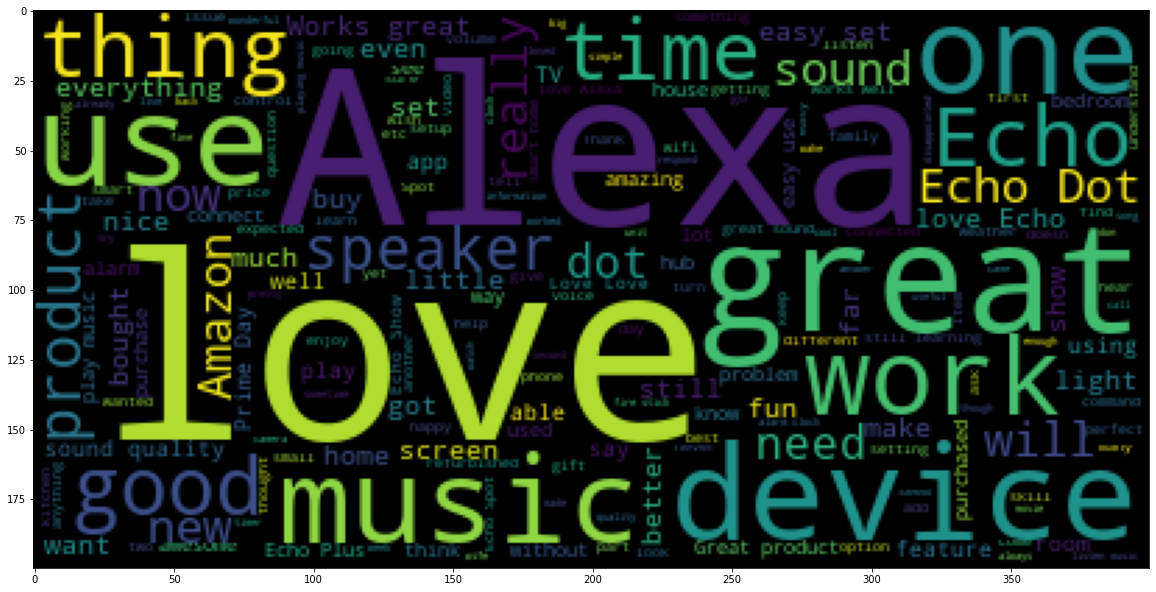

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

## **PRÉ-PROCESSAMENTO DOS DADOS**

**Verificando Valores Null e NaN**

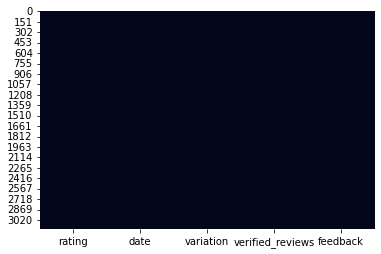

In [14]:
sns.heatmap(reviews_df.isnull(), cbar=False);

In [15]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [16]:
reviews_df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [17]:
# Separando os Reviews Positivos
positive = reviews_df[reviews_df['feedback'] == 1]
# Separando os Reviews Negativos
negative = reviews_df[reviews_df['feedback'] == 0]

**Limpeza Dos Dados:**

In [18]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [19]:
# Removendo algumas colunas que não serão usadas na avaliação dos comentários
reviews_df = reviews_df.drop(['date', 'rating'], axis = 1)

In [20]:
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [21]:
#Verificando o número de categorias da variável categorica
reviews_df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [22]:
X_cat = reviews_df[['variation']]
X_cat

,variation
0,Charcoal Fabric
1,Charcoal Fabric
2,Walnut Finish
3,Charcoal Fabric
4,Charcoal Fabric
...,...
3145,Black Dot
3146,Black Dot
3147,Black Dot
3148,White Dot


In [23]:
# Irei aplicar o OneHotEnconder na features categoricas da base ele transforma cada categoria da variavel em uma nova coluna e preenche a linha com 0 ou 1 dependendo se o registro possui ou não a categoria
# teria a opção de usar o label encoder que transforma o texto categorico em 1 numero sendo 1 numero diferentes (1,2,3...) para cada texto distinto mas o algoritmo na hora da aprendizagem pode levar essa
# ordem em consideração o que não representa a realidade nesse caso

In [24]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()

In [25]:
X_cat = oneHotEncoder.fit_transform(X_cat).toarray()

In [26]:
colunas = oneHotEncoder.get_feature_names(['variation'])

In [27]:
X_cat = pd.DataFrame(X_cat, columns= colunas)

In [28]:
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [29]:
reviews_df = pd.concat([reviews_df, X_cat], axis = 1)
reviews_df

,verified_reviews,feedback,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **SOLUÇÃO PROPOSTA**

Criar um modelo de machine learning que passado o comentário o modelo possa classificar o sentimento entre negativo ou positivo 

##**Processando os Textos da Base**

**Importando Bibliotecas de Removação de Stop Words, Pontuação e Tokenização:**

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'e

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

**Pipeline de Limpeza dos Textos:**

In [33]:
# Criando uma função que utiliza as bibliotecas importadas para limpar os textos passados
def message_cleaning(message):
  text = [char for char in message if char not in string.punctuation]
  text = ''.join(text)
  text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
  return text

In [34]:
# Aplicando o vectorizer que pega cada palavra unica da base de dados e transforma em uma array com a contagem de vezes que a palavra aparece para que o modelo entenda
# Dentro da função vectorizer passamos a função que criamos acima
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])
colunas = vectorizer.get_feature_names()

In [35]:
# Removendo a coluna reviews pois ela ja foi processada pelo vectorizer
reviews_df.drop(['verified_reviews'], axis = 1, inplace=True)

In [36]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray(), columns=colunas)

In [37]:
# Fazendo a junção das duas base
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

**Separando as Features**

In [38]:
x = reviews_df.drop(['feedback'], axis = 1)

In [47]:
Y = reviews_df['feedback']

In [48]:
y = Y.iloc[:, 0:1]

##**Importando as Bibliotecas de Machine Learning**

In [41]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error, confusion_matrix, classification_report

##**Construção Dos Modelos**

In [49]:
# Usando Holdout separando 20% dos dados para teste
x_Val_Train, x_Test, y_Val_Train, y_Test = train_test_split(x, y, test_size=0.2)

In [51]:
# Dos 80% separados para Treino vamos separar 20% para Validação
x_Train, x_Validation, y_Train, y_Validation = train_test_split(x_Val_Train, y_Val_Train, test_size=0.2)

**Treinamento dos Modelos:**

In [ ]:
# Foram Feitos Testes com outros tipos de classificadores mas o Naive Bayes e o Logistic Regression apresentaram melhores resultados

# Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(x_Train, y_Train)

# Logistic Regression
LR = LogisticRegression()
LR.fit(x_Train, y_Train)

In [56]:
y_Pred_Naive = naive_bayes.predict(x_Test)
y_Pred_LR = LR.predict(x_Test)

In [58]:
naive = "Naive Bayes: %f" % (accuracy_score(y_Test, y_Pred_Naive))
lr = "Logistic: %f" % (accuracy_score(y_Test, y_Pred_LR))
print(naive)
print(lr)

Naive Bayes: 0.930159
Logistic: 0.926984


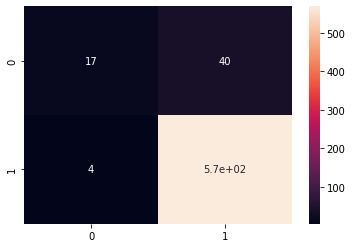

In [59]:
# Matriz de Confusão Naive Bayes
cm = confusion_matrix(y_Test, y_Pred_Naive)
sns.heatmap(cm, annot=True);

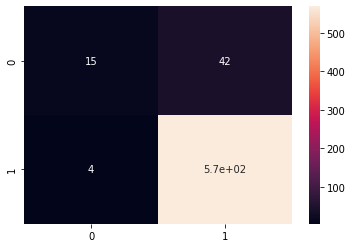

In [60]:
# Matriz de Confusão Logistic Regression
cm = confusion_matrix(y_Test, y_Pred_LR)
sns.heatmap(cm, annot=True);

In [61]:
print(classification_report(y_Test, y_Pred_Naive))

              precision    recall  f1-score   support

           0       0.81      0.30      0.44        57
           1       0.93      0.99      0.96       573

    accuracy                           0.93       630
   macro avg       0.87      0.65      0.70       630
weighted avg       0.92      0.93      0.92       630



In [62]:
print(classification_report(y_Test, y_Pred_LR))

              precision    recall  f1-score   support

           0       0.79      0.26      0.39        57
           1       0.93      0.99      0.96       573

    accuracy                           0.93       630
   macro avg       0.86      0.63      0.68       630
weighted avg       0.92      0.93      0.91       630



Escolhido para persistência: Naive Bayes

**Salvando o Modelo:**

In [63]:
import pickle
with open('text_classifier.pkl', 'wb') as f:
  pickle.dump([naive_bayes, oneHotEncoder, vectorizer], f)